# ***Allen's interval algebra***

## Import required packages

In [ ]:
try:
  import pm4py
except:
  !pip install -U pm4py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

from matplotlib.patches import Rectangle
from pm4py import discover_bpmn_inductive
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

## Load the event log

In [ ]:
try:
  os.remove("/content/event_log.xes.gz")
  os.remove("/content/event_log.xes")
except:
  pass
  
!wget -O "/content/event_log.xes.gz" https://data.4tu.nl/file/6af6d5f0-f44c-49be-aac8-8eaa5fe4f6fd/28b83e72-375e-4da4-8459-a8506e898edf
os.system('gzip -dk event_log.xes.gz')

SyntaxError: ignored

In [ ]:
!wget -O "/content/event_log.csv" https://data.4tu.nl/file/e9c00fe9-c87a-450e-8bd6-d5e06a6b309a/9d7cd406-9826-4adf-8418-c751b475f556

--2023-03-22 01:52:28--  https://data.4tu.nl/file/e9c00fe9-c87a-450e-8bd6-d5e06a6b309a/9d7cd406-9826-4adf-8418-c751b475f556
Resolving data.4tu.nl (data.4tu.nl)... 131.180.169.22
Connecting to data.4tu.nl (data.4tu.nl)|131.180.169.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6668750 (6.4M) [application/octet-stream]
Saving to: ‘/content/event_log.csv’

/content/event_log. 100%[===================>]   6.36M  8.26MB/s    in 0.8s    

2023-03-22 01:52:30 (8.26 MB/s) - ‘/content/event_log.csv’ saved [6668750/6668750]



## Import the event log and convert it into the data frame

In [ ]:
el = xes_importer.apply("/content/event_log.xes")
el_df = log_converter.apply(el, variant=log_converter.Variants.TO_DATA_FRAME)
el_df.head()

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

,isCancelled,diagnosis,time:timestamp,caseType,speciality,org:resource,concept:name,blocked,isClosed,flagD,...,lifecycle:transition,case:concept:name,closeCode,actRed,actOrange,flagC,msgCount,version,msgType,msgCode
0,False,A,2012-12-16 18:33:10+00:00,A,A,ResA,NEW,False,True,True,...,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2013-12-15 18:00:37+00:00,NaN,NaN,NaN,FIN,NaN,NaN,NaN,...,complete,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2013-12-16 02:53:38+00:00,NaN,NaN,NaN,RELEASE,NaN,NaN,NaN,...,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2013-12-17 11:56:29+00:00,NaN,NaN,NaN,CODE OK,NaN,NaN,NaN,...,complete,A,NaN,False,False,False,0.0,A,NaN,NaN
4,NaN,NaN,2013-12-19 02:44:31+00:00,NaN,NaN,ResB,BILLED,NaN,NaN,NaN,...,complete,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
el_df = pd.read_csv("/content/event_log.csv", sep=";")
el_df.head()

,CI Name (aff),CI Type (aff),CI Subtype (aff),Service Component WBS (aff),Change ID,Change Type,Risk Assessment,Emergency Change,CAB-approval needed,Planned Start,...,Scheduled Downtime Start,Scheduled Downtime End,Actual Start,Actual End,Requested End Date,Change record Open Time,Change record Close Time,Originated from,# Related Interactions,# Related Incidents
0,HMD000002,hardware,MigratieDummy,WBS000195,C00000003,Release Type 11,Minor Change,N,N,30-8-2012 7:00,...,NaN,NaN,18-12-2013 14:00,18-12-2013 16:15,1-6-2012 0:00,1-9-2011 9:13,18-12-2013 16:16,Problem,NaN,NaN
1,SUB000494,subapplication,Web Based Application,WBS000162,C00000005,Release Type 13,Business Change,N,Y,4-3-2014 9:00,...,NaN,NaN,4-3-2014 17:52,4-3-2014 17:52,7-6-2012 12:00,6-10-2011 15:54,5-3-2014 7:03,Problem,NaN,NaN
2,OVR000012,no type,no subtype,WBS000256,C00000006,Release Type 11,Minor Change,N,N,1-6-2011 7:00,...,NaN,NaN,17-4-2013 14:00,13-12-2013 17:00,31-3-2012 17:00,7-10-2011 10:06,30-12-2013 9:40,Problem,NaN,NaN
3,ASW000010,software,Automation Software,WBS000284,C00000007,Standard Change Type 93,Minor Change,N,N,21-6-2013 9:00,...,NaN,NaN,NaN,NaN,2-9-2013 18:00,14-11-2011 17:17,10-10-2013 10:16,Problem,NaN,NaN
4,ASW000010,software,Automation Software,WBS000284,C00000008,Standard Change Type 93,Minor Change,N,N,21-10-2013 9:00,...,NaN,NaN,24-10-2013 0:00,25-10-2013 23:00,8-11-2013 18:00,30-11-2011 14:59,27-10-2013 14:52,Problem,NaN,NaN


## ***Import required packages***

In [ ]:
try:
  import pm4py
except:
  !pip install -U pm4py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

from scipy.integrate import trapz, simps
from typing import Tuple
from matplotlib.patches import Rectangle
from pm4py import discover_bpmn_inductive
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

## ***Import the event log and convert it into the data frame***

In [ ]:
log = xes_importer.apply("exercise6.xes")
el_df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
el_df.head()

parsing log, completed traces ::   0%|          | 0/132 [00:00<?, ?it/s]

,org:resource,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,Call Centre Agent,2005-12-31 23:00:00+00:00,check if sufficient information is available,start,0
1,Call Centre Agent,2006-01-13 23:00:00+00:00,check if sufficient information is available,complete,0
2,Call Centre Agent,2006-01-13 23:00:00+00:00,register claim,start,0
3,Call Centre Agent,2008-01-29 23:00:00+00:00,register claim,complete,0
4,Claims handler,2008-01-29 23:00:00+00:00,determine likelihood of claim,start,0


## ***Modify the event log to get the "case_id", "task_name", "start_ts" and "complete_ts"***

In [ ]:
el_df_ts = el_df.copy()
el_df_ts["start_ts"] = el_df[el_df["lifecycle:transition"] == "start"]["time:timestamp"].map(lambda t: t.timestamp())
el_df_ts["complete_ts"] = el_df[el_df["lifecycle:transition"] == "complete"]["time:timestamp"].map(lambda t: t.timestamp())
el_df_ts.drop(["org:resource", "lifecycle:transition", "time:timestamp"], axis=1, inplace=True)
el_df_ts = el_df_ts.rename(columns={"concept:name": "task_name", "case:concept:name": "case_id"})
el_dt_ts = el_df_ts[["case_id", "task_name", "start_ts", "complete_ts"]]
el_df_ts.head()

,task_name,case_id,start_ts,complete_ts
0,check if sufficient information is available,0,1.136070e+09,NaN
1,check if sufficient information is available,0,NaN,1.137193e+09
2,register claim,0,1.137193e+09,NaN
3,register claim,0,NaN,1.201648e+09
4,determine likelihood of claim,0,1.201648e+09,NaN


## ***Groupd by "case_id" and "task_name". Aggregate by "start_ts" and "complete_ts"***

In [ ]:
el_df_ts_grouped = el_df_ts.groupby(["case_id", "task_name"], as_index=False).agg({"start_ts": "first", "complete_ts": "last"})
el_df_ts_grouped["interval_ts"] = el_df_ts_grouped["complete_ts"] - el_df_ts_grouped["start_ts"]
el_df_ts_grouped.sort_values("case_id", inplace=True)
el_df_ts_grouped.head()

,case_id,task_name,start_ts,complete_ts,interval_ts
0,0,advise claimant on reimbursement,1.288566e+09,1.335136e+09,46569600.0
1,0,assess claim,1.205795e+09,1.286924e+09,81129600.0
2,0,check if sufficient information is available,1.136070e+09,1.137193e+09,1123200.0
3,0,close claim,1.335136e+09,1.335481e+09,345600.0
4,0,determine likelihood of claim,1.201648e+09,1.205795e+09,4147200.0


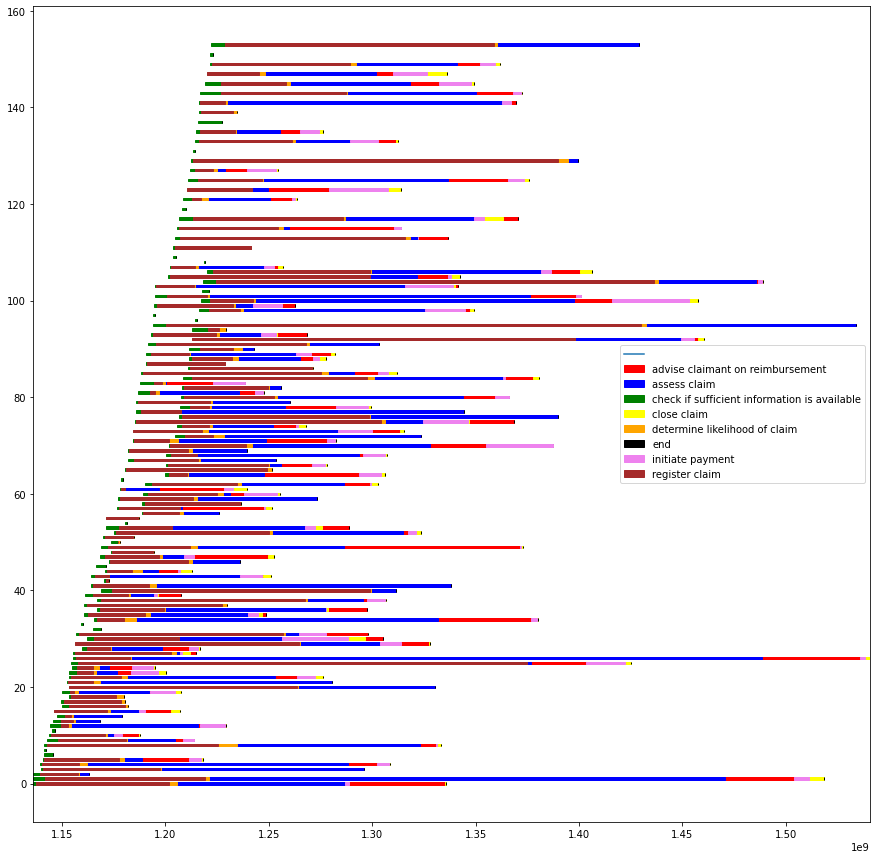

In [ ]:
_, ax = plt.subplots(figsize=(15, 15))
ax.plot([0, 10], [0, 10])
colors_mapping = {"advise claimant on reimbursement": "red", "assess claim": "blue",
                  "check if sufficient information is available": "green",
                  "close claim": "yellow", "determine likelihood of claim": "orange",
                  "end": "black", "initiate payment": "violet", "register claim": "brown"}

for i in range(len(el_df_ts_grouped)):
  case_id = int(el_df_ts_grouped["case_id"][i])
  task_name = el_df_ts_grouped["task_name"][i]
  start_ts = el_df_ts_grouped["start_ts"][i]
  interval_ts = el_df_ts_grouped["interval_ts"][i]
  color = colors_mapping[task_name]
  ax.add_patch(Rectangle((start_ts, case_id - 0.25), interval_ts, 0.5, color=color))

plt.xlim([el_df_ts_grouped["start_ts"].min(), el_df_ts_grouped["start_ts"].max()])
plt.legend(["", "advise claimant on reimbursement", "assess claim",
            "check if sufficient information is available", "close claim",
            "determine likelihood of claim", "end", "initiate payment",
            "register claim"])
plt.show()

In [ ]:
def combine_task_intervals(df: pd.DataFrame, task_name: str, color: str, to_display: bool = False) -> Tuple[np.ndarray, np.ndarray]:
  df = df[df["task_name"] == task_name].reset_index()
  timestamps = np.array(sorted(list(df["start_ts"]) + list(df["complete_ts"])))
  frequencies = np.array([0] * len(timestamps))

  for i in range(len(df)):
    start_ts = df["start_ts"][i]
    complete_ts = df["complete_ts"][i]
    start_idx = list(timestamps).index(start_ts)
    complete_idx = list(timestamps).index(complete_ts)

    for j in range(start_idx, complete_idx + 1):
      frequencies[j] = frequencies[j] + 1

  if to_display:
    _, ax = plt.subplots(figsize=(15, 15))
    ax.plot([0, 10], [0, 10])

    for i in range(len(timestamps) - 1):
      t1 = timestamps[i]
      t2 = timestamps[i + 1]
      freq = frequencies[i]
      ax.add_patch(Rectangle((t1, 0), t2 - t1, freq, color=color))

    plt.legend(["", task_name])
    plt.xlim([min(timestamps), max(timestamps)])
    plt.show()

  return timestamps, frequencies

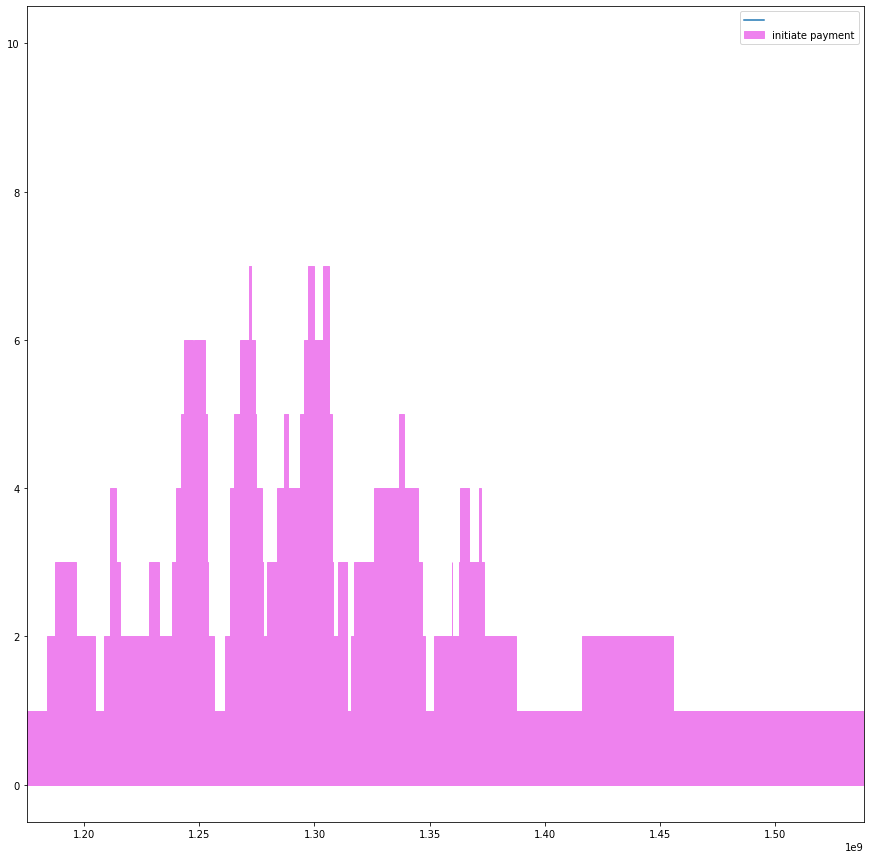

In [ ]:
timestamps1, frequencies1 = combine_task_intervals(el_df_ts_grouped, "initiate payment", "violet", to_display=True)

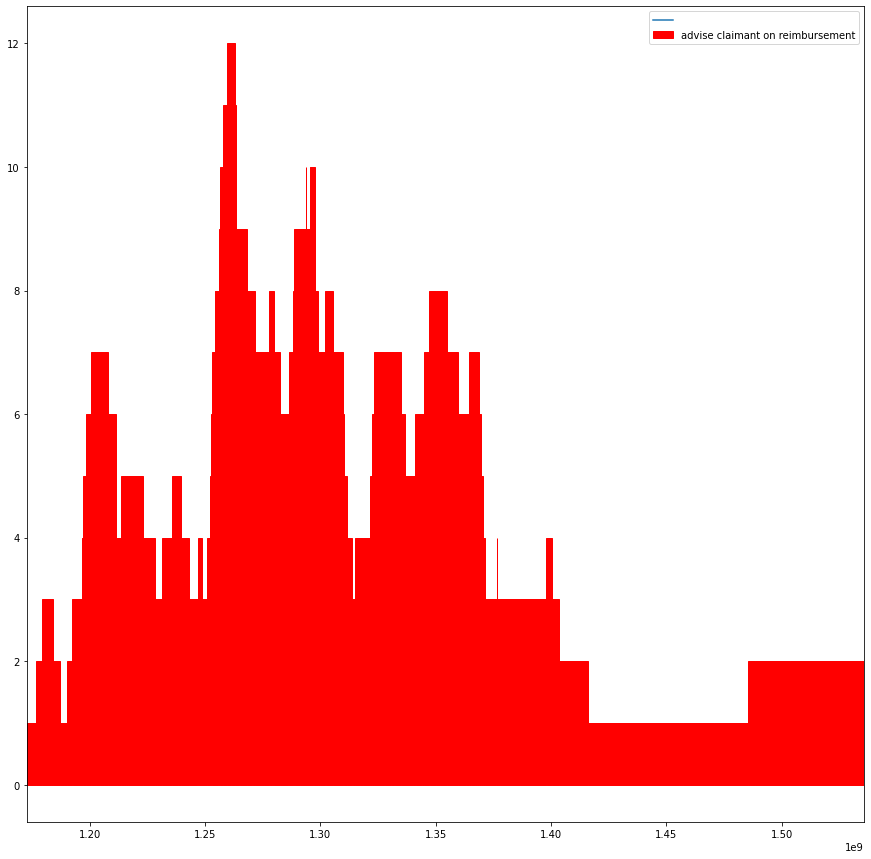

In [ ]:
timestamps2, frequencies2 = combine_task_intervals(el_df_ts_grouped, "advise claimant on reimbursement", "red", to_display=True)

In [ ]:
def approximate(timestamps: np.ndarray, frequencies: np.ndarray, degree: int, task_name: str, color: str, to_display: bool = False) -> np.ndarray:
  coef = np.polyfit(timestamps, frequencies, deg=degree)

  if to_display:
    _, ax = plt.subplots(figsize=(15, 15))
    ax.plot([0, 10], [0, 10])

    for i in range(len(timestamps) - 1):
      t1 = timestamps[i]
      t2 = timestamps[i + 1]
      freq = frequencies[i]
      ax.add_patch(Rectangle((t1, 0), t2 - t1, freq, color=color))

    plt.legend(["", task_name, "Approximation"])
    plt.plot(timestamps, np.polyval(coef, timestamps))
    plt.xlim([min(timestamps), max(timestamps)])
    plt.show()

  return coef

/usr/local/lib/python3.9/dist-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
<ipython-input-163-0840a33ad165>:1: RankWarning: Polyfit may be poorly conditioned
  coef1 = approximate(timestamps1, frequencies1, 30, "initial payment", "violet", to_display=True)


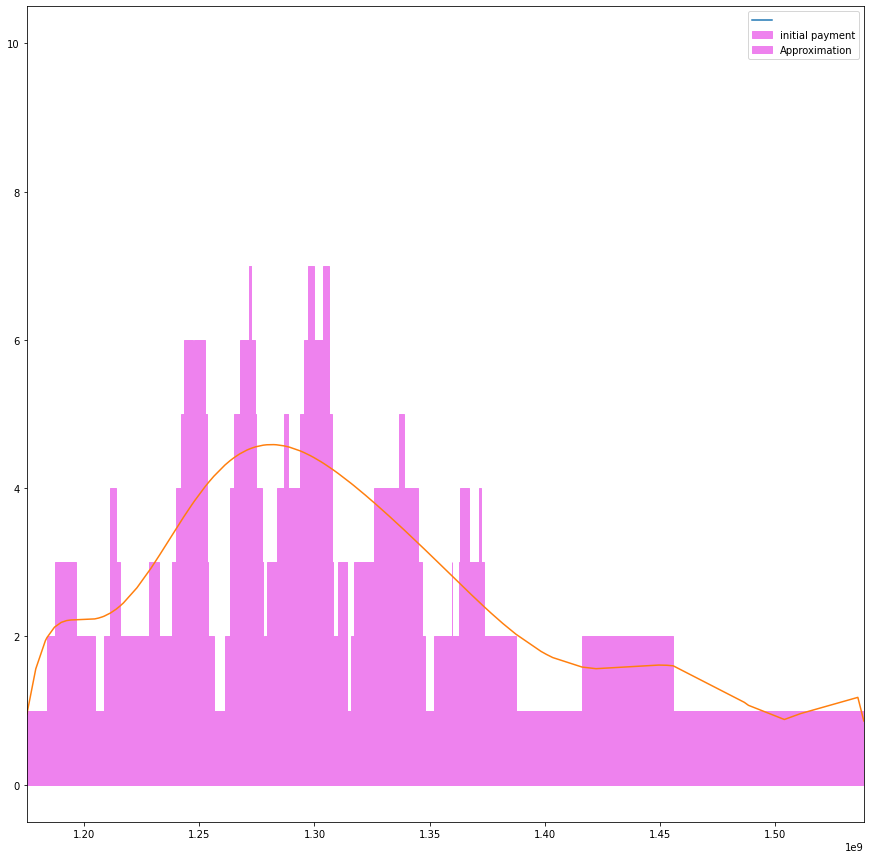

In [ ]:
coef1 = approximate(timestamps1, frequencies1, 30, "initial payment", "violet", to_display=True)

/usr/local/lib/python3.9/dist-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
<ipython-input-164-5d79c9091541>:1: RankWarning: Polyfit may be poorly conditioned
  coef2 = approximate(timestamps2, frequencies2, 30, "advise claimant on reimbursement", "red", to_display=True)


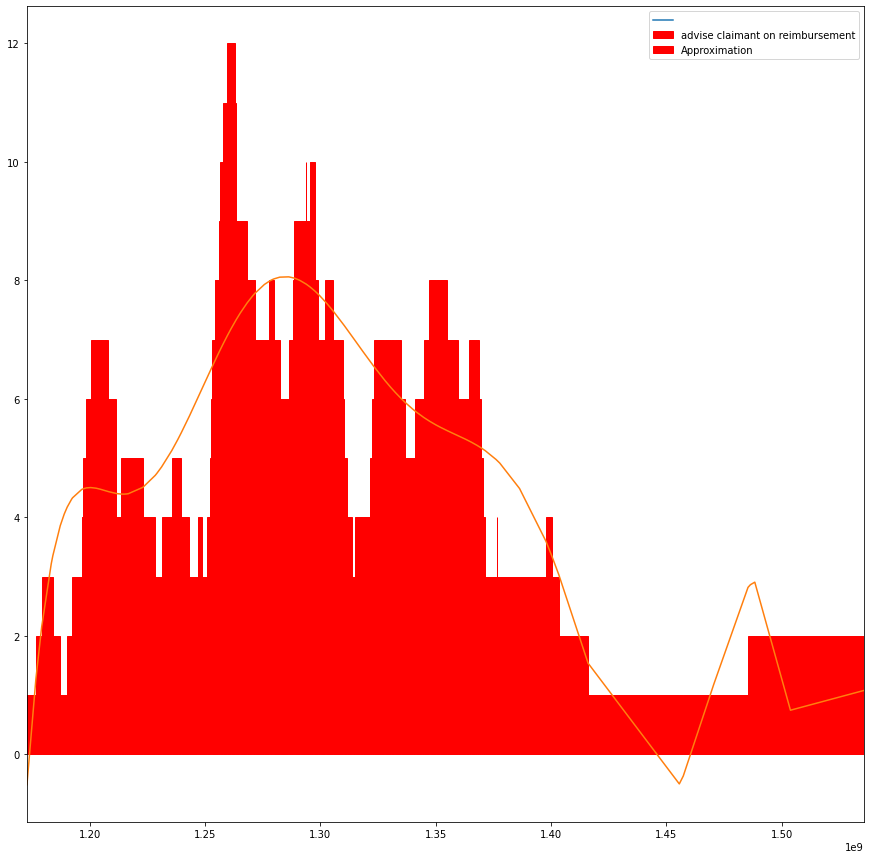

In [ ]:
coef2 = approximate(timestamps2, frequencies2, 30, "advise claimant on reimbursement", "red", to_display=True)

In [ ]:
int1_trapz = trapz(frequencies1, timestamps1)
int1_simps = simps(frequencies1, timestamps1)

int2_trapz = trapz(frequencies2, timestamps2)
int2_simps = simps(frequencies2, timestamps2)

print(f"{int1_trapz}\n{int1_simps}\n{int2_trapz}\n{int2_simps}")

874195200.0
824061674.3086724
1442318400.0
1420953034.8650622


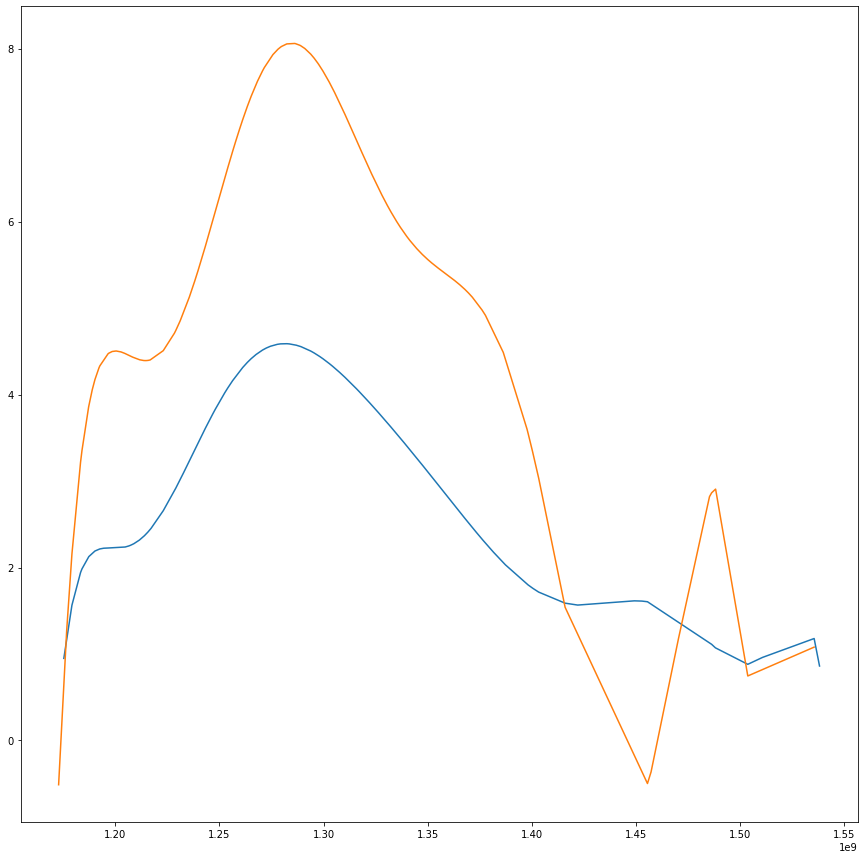

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(timestamps1, np.polyval(coef1, timestamps1))
plt.plot(timestamps2, np.polyval(coef2, timestamps2))
plt.show()

In [ ]:
conv = np.convolve(timestamps1, timestamps2, mode="valid")
print(conv)

[2.54628443e+20]
